# **Initialization**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_company = pd.read_excel('/content/drive/MyDrive/2425MBD41_Project_Dataset.xlsx', sheet_name='COMPANY')
df_investment = pd.read_excel('/content/drive/MyDrive/2425MBD41_Project_Dataset.xlsx', sheet_name='INVESTMENT')
df_acquisition = pd.read_excel('/content/drive/MyDrive/2425MBD41_Project_Dataset.xlsx', sheet_name='ACQUISITION')
df_employee = pd.read_excel('/content/drive/MyDrive/2425MBD41_Project_Dataset.xlsx', sheet_name='EMPLOYEE')

df_company.head()

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10


# **COMPANY SHEET ANALYSIS**



1. What is the total number of companies in the dataset?

In [ ]:
total_companies = df_company['COMPANY_NAME'].nunique()
print('The total number of companies is',total_companies)

The total number of companies is 1000


2. How are they distributed by country?

In [ ]:
df_company[['CITY', 'STATE', 'COUNTRY']] = df_company['LOCATION'].str.split(', ', expand=True, n=2)
df_company.head()

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,CITY,STATE,COUNTRY
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000,San Francisco,California,United States
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000,Hangzhou,Zhejiang,China
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100,New York,New York,United States
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+,Beijing,Beijing,China
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10,Brooklyn,New York,United States


<Axes: xlabel='COUNTRY'>

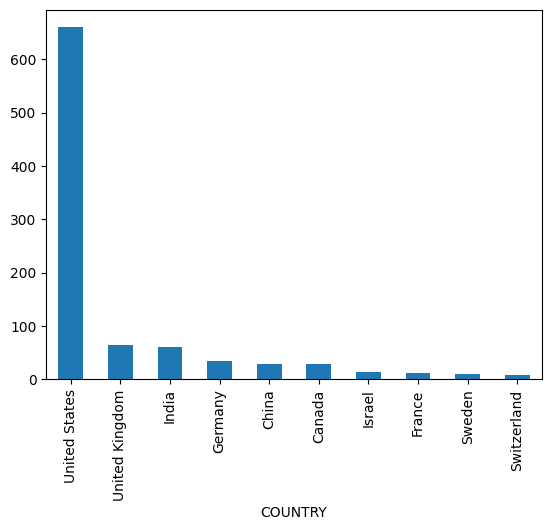

In [ ]:
industry_distribution = df_company['COUNTRY'].value_counts()
industry_distribution.head(10).plot.bar()

In [ ]:
df_company['COUNTRY'].value_counts().head(1)

,count
COUNTRY,
United States,660


3. Since the US have the highest number of companies, what is their distribution by US state?

<Axes: ylabel='STATE'>

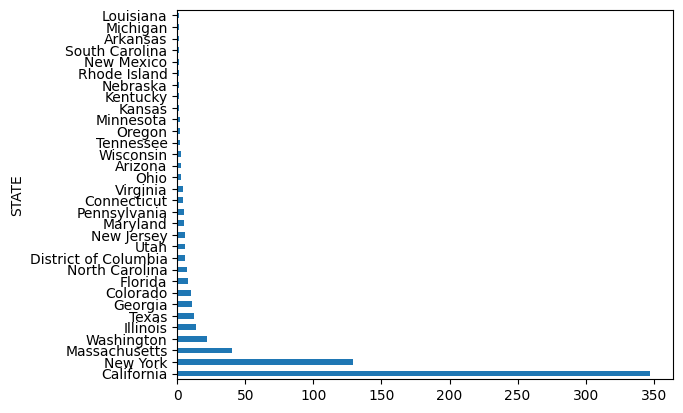

In [ ]:
us_companies = df_company[df_company['COUNTRY'] == 'United States']
state_distribution_us = us_companies['STATE'].value_counts()
state_distribution_us.plot.barh()

**Cleaning data to get better insights**

In [ ]:
df_company['CLOSED_ON'] = df_company['CLOSED_ON'].replace(['—', 'N/A', ''], pd.NA)
df_company['EXITED_ON'] = df_company['EXITED_ON'].replace(['—', 'N/A', ''], pd.NA)

df_company['EXITED_ON'].head()

,EXITED_ON
0,"Nov 7, 2013"
1,<NA>
2,<NA>
3,"Jul 9, 2018"
4,<NA>


4. How many companies have exited and closed?



In [ ]:
exited_companies = df_company['EXITED_ON'].notna().sum()
closed_companies = df_company['CLOSED_ON'].notna().sum()

print(f"Number of Exited Companies: {exited_companies}")
print(f"Number of Closed Companies: {closed_companies}")

Number of Exited Companies: 322
Number of Closed Companies: 5


5. What proportion of companies are still active, have exited, or have closed?

In [ ]:
conditions = [
    (df_company['EXITED_ON'].isna()) & (df_company['CLOSED_ON'].isna()),
    df_company['EXITED_ON'].notna(),
    df_company['CLOSED_ON'].notna()]
choices = ['Active', 'Exited', 'Closed']
df_company['Status'] = np.select(conditions, choices, default='Unknown')

status_proportions = df_company['Status'].value_counts(normalize=True) * 100
formatted_proportions = status_proportions.map("{:.2f}%".format)

print("Proportion of Companies:")
print(formatted_proportions)

Proportion of Companies:
Status
Active    67.40%
Exited    32.20%
Closed     0.40%
Name: proportion, dtype: object


# **INVESTMENT SHEET ANALYSIS**

Converting the currencies to USD.

In [ ]:
conversion_rates = {
    '$': 1,
    '€': 1.1,
    '£': 1.3,
    '¥': 0.007,
    '₹': 0.012 }

def convert_currency(value):
    if pd.isna(value):
        return None

    value = str(value).replace(',', '')
    currency_symbol = value[0]
    amount = value[1:]

    if currency_symbol in conversion_rates:
        rate = conversion_rates[currency_symbol]
        converted_amount = float(amount) * rate
        return converted_amount

    try:
        return float(value)
    except ValueError:
        return None

df_investment['MONEY_RAISED_USD'] = df_investment['MONEY_RAISED'].apply(convert_currency)

print(df_investment[['MONEY_RAISED', 'MONEY_RAISED_USD']].head())

     MONEY_RAISED  MONEY_RAISED_USD
0    $250,000,000      2.500000e+08
1     $50,000,000      5.000000e+07
2      $6,000,000      6.000000e+06
3     $10,000,000      1.000000e+07
4  $1,000,000,000      1.000000e+09


6. How many companies have received at least one round of investment?

In [ ]:
invested_companies = df_investment['COMPANY_NAME'].nunique()
print(invested_companies, 'companies have received at least one round of investment.')

935 companies have received at least one round of investment.


7. What is the total amount raised by each company?

In [ ]:
total_raised_per_company = df_investment.groupby('COMPANY_NAME')['MONEY_RAISED_USD'].sum()
total_raised_per_company.apply(lambda x: "${:,.0f}".format(x))

,MONEY_RAISED_USD
COMPANY_NAME,
1mg,"$93,620,000"
23andMe,"$819,853,320"
360VUZ,"$8,443,000"
4D Molecular Therapeutics,"$171,999,995"
908 Devices,"$83,100,000"
...,...
monday.com,"$84,100,000"
nCino,"$374,755,790"
project44,"$155,500,000"


8. What is the average and median amount raised in each funding type (e.g., Seed, Series A, Series B)?

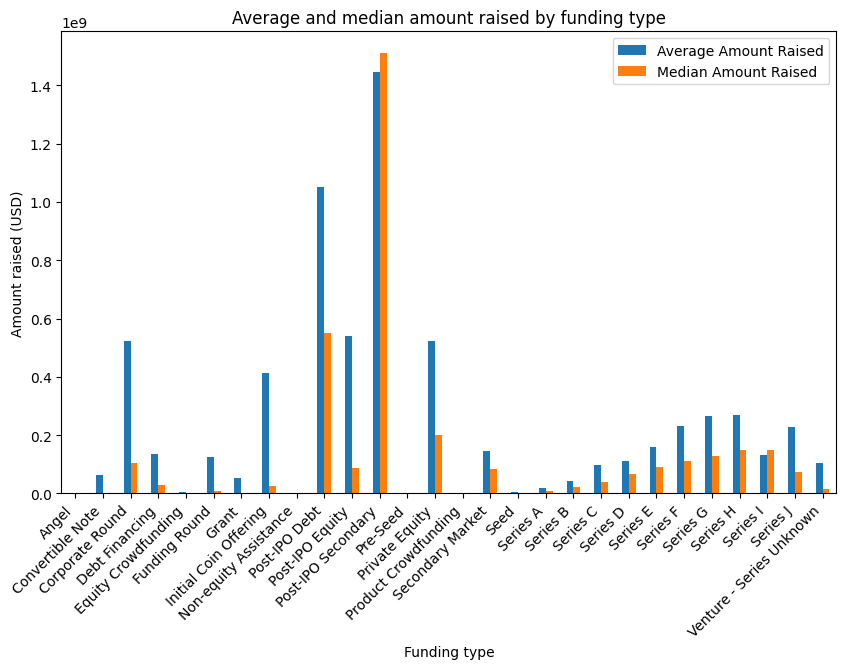

                         Average Amount Raised Median Amount Raised
FUNDING_TYPE                                                       
Angel                               $1,228,456             $650,000
Convertible Note                   $63,995,367           $2,000,000
Corporate Round                   $522,737,354         $105,000,000
Debt Financing                    $136,506,218          $28,700,000
Equity Crowdfunding                 $6,551,924           $2,860,000
Funding Round                     $126,525,032           $8,476,000
Grant                              $51,487,272           $1,600,000
Initial Coin Offering             $412,972,727          $26,700,000
Non-equity Assistance                  $78,500              $50,000
Post-IPO Debt                   $1,051,942,857         $550,000,000
Post-IPO Equity                   $540,118,624          $86,544,937
Post-IPO Secondary              $1,445,087,500       $1,510,000,000
Pre-Seed                              $359,450  

In [ ]:
funding_type_stats = df_investment.groupby('FUNDING_TYPE')['MONEY_RAISED_USD'].agg(['mean', 'median'])
funding_type_stats = df_investment.groupby('FUNDING_TYPE')['MONEY_RAISED_USD'].agg(['mean', 'median'])

funding_type_stats = funding_type_stats.rename(
    columns={
        'mean': 'Average Amount Raised',
        'median': 'Median Amount Raised' })

funding_type_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Average and median amount raised by funding type')
plt.xlabel('Funding type')
plt.ylabel('Amount raised (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

for col in ['Average Amount Raised', 'Median Amount Raised']:
    funding_type_stats[col] = funding_type_stats[col].apply(lambda x: "${:,.0f}".format(x))
print(funding_type_stats)

9. Which company has raised the most funding overall, and how much did it raise?


In [ ]:
most_funded_company = total_raised_per_company.idxmax()
most_funded_amount = total_raised_per_company.max()

print(f"{most_funded_company} is the most funded company, with a total funding of ${most_funded_amount:,.0f}.")

Reliance Jio is the most funded company, with a total funding of $24,440,156,000.


10. Which funding types are most common for companies at different investment stages (e.g., Seed, Early-Stage, Growth)?

In [ ]:
common_funding_stages = df_investment.groupby('INVESTMENT_STAGE')['FUNDING_TYPE'].value_counts()

common_funding_stages

INVESTMENT_STAGE     FUNDING_TYPE            
Early Stage Venture  Series A                    854
                     Series B                    701
Late Stage Venture   Series C                    582
                     Series D                    375
                     Series E                    264
                     Series F                    149
                     Series G                     66
                     Series H                     36
                     Series J                     11
                     Series I                      9
Private Equity       Private Equity              170
Seed                 Seed                        762
                     Pre-Seed                    111
                     Angel                        81
—                    Venture - Series Unknown    558
                     Debt Financing              242
                     Post-IPO Equity             219
                     Secondary Market            211
                     Corporate Round             102
                     Grant                        97
                     Post-IPO Debt                82
                     Convertible Note             80
                     Funding Round                55
                     Equity Crowdfunding          50
                     Non-equity Assistance        37
                     Initial Coin Offering        17
                     Post-IPO Secondary           10
                     Product Crowdfunding          6
Name: count, dtype: int64

11. How does the amount of money raised vary by industry category?

In [ ]:
merged_df = pd.merge(df_company[['COMPANY_NAME', 'CATEGORY']], df_investment, on='COMPANY_NAME')
money_raised_by_industry = merged_df.groupby('CATEGORY')['MONEY_RAISED_USD'].sum()

money_raised_by_industry.apply(lambda x: "${:,.0f}".format(x))

,MONEY_RAISED_USD
CATEGORY,
"3D Printing, 3D Technology, Precious Metals, Robotics","$613,000,000"
"3D Technology, Aerospace, Artificial Intelligence, Manufacturing, Space Travel","$685,720,000"
"3D Technology, Architecture, Artificial Intelligence, CAD, Information Technology, Machine Learning, Property Development, Software",$0
"3D Technology, Artificial Intelligence, Augmented Reality, Computer Vision, Machine Learning, Virtual Reality","$13,350,000"
"3D Technology, Augmented Reality, Media and Entertainment, Mobile Apps, Social Media, Video, Video Streaming, Virtual Reality","$8,443,000"
...,...
"Social Media, Video, Video Games, Video Streaming","$15,000,000"
Software,"$17,000,000"
"Subscription Service, Video","$4,050,000"


# **ACQUISITION SHEET ANALYSIS**

Correcting the spelling mistake.

In [ ]:
df_acquisition['ACQUISITION_TYPE'] = df_acquisition['ACQUISITION_TYPE'].replace('Acquihire', 'Acquisition')

12. Which company has the highest number of acquisitions, and what are the details of those acquisitions?

In [ ]:
acquisitions_count = df_acquisition['COMPANY_NAME'].value_counts()
top_acquisition_company = acquisitions_count.idxmax()
acquisitions_count = df_acquisition['COMPANY_NAME'].value_counts()
top_acquisition_company = acquisitions_count.idxmax()
top_acquisition_count = acquisitions_count.max()

print(top_acquisition_company, "is the company that has the highest number of acquisitions, with", top_acquisition_count, "acquisitions.")


Microsoft is the company that has the highest number of acquisitions, with 235 acquisitions.


13. What proportion of companies with acquisitions has also received investment funding?


In [ ]:
acquired_companies = df_acquisition['COMPANY_NAME'].unique()
invested_companies = df_investment['COMPANY_NAME'].unique()
acquired_and_invested = len(set(acquired_companies).intersection(invested_companies)) / len(acquired_companies)

percentage = acquired_and_invested * 100
print(f"Percentage of acquired companies that were also invested in: {percentage:.2f}%")


Percentage of acquired companies that were also invested in: 94.16%


14. Which industries has the most acquisitions?

In [ ]:
merged_acquisition = pd.merge(df_company[['COMPANY_NAME', 'CATEGORY']], df_acquisition, on='COMPANY_NAME')

industry_acquisition_counts = merged_acquisition['CATEGORY'].value_counts()
top_acquisition_industry = industry_acquisition_counts.idxmax()

print(top_acquisition_industry)

Cloud Computing, Collaboration, Consumer Electronics, Developer Tools, Enterprise Software, Operating Systems, Software


15. On average, how long after founding do companies start acquiring other companies?

In [ ]:
df_acquisition['ANNOUNCED_DATE'] = pd.to_datetime(df_acquisition['ANNOUNCED_DATE'], errors='coerce')
merged_acquisition = pd.merge(df_company[['COMPANY_NAME', 'FOUNDED_ON']], df_acquisition, on='COMPANY_NAME')

merged_acquisition['FOUNDED_ON'] = pd.to_datetime(merged_acquisition['FOUNDED_ON'], errors='coerce')
time_to_acquisition = (merged_acquisition['ANNOUNCED_DATE'] - merged_acquisition['FOUNDED_ON']).mean()

years = time_to_acquisition.days // 365
remaining_days = time_to_acquisition.days % 365

print(f"Time to acquisition: {years} years and {remaining_days} days")

Time to acquisition: 38 years and 224 days


# **EMPLOYEE SHEET ANALYSIS**

16. How many unique employees are there across all companies and what is the average number of employees per company?

In [ ]:
unique_employees = df_employee['EMPLOYEE_MD5'].nunique()
avg_employees_per_company = df_employee['COMPANY_NAME'].value_counts().mean()

print(f'There are a total of {unique_employees} unique employees in the dataset.')
print(f'On average, each company has approximately {avg_employees_per_company:.0f} employees.')

There are a total of 20702 unique employees in the dataset.
On average, each company has approximately 21 employees.


17. Which job titles are most common, and how many companies have employees with those titles?

In [ ]:
job_title_counts = df_employee['JOB_TITLES'].value_counts()
top_job_titles = job_title_counts.head(5)
companies_with_top_titles = df_employee[df_employee['JOB_TITLES'].isin(top_job_titles.index)]['COMPANY_NAME'].nunique()

print("\nTop 5 Most Frequent Job Titles:")
print(top_job_titles.to_string())
print(f"\nThese top 5 job titles are found in {companies_with_top_titles} unique companies.")


Top 5 Most Frequent Job Titles:
JOB_TITLES
Software Engineer           510
Product Manager             232
Managing Director           186
Senior Software Engineer    179
CEO                         157

These top 5 job titles are found in 295 unique companies.


18. Which companies employ the highest number of employees with unique job titles?

In [ ]:
unique_titles_per_company = df_employee.groupby('COMPANY_NAME')['JOB_TITLES'].nunique()
most_diverse_companies = unique_titles_per_company.nlargest(5)

print('Top 5 companies with the most diverse job titles:\n', most_diverse_companies)

Top 5 companies with the most diverse job titles:
 COMPANY_NAME
Microsoft    1130
Google       1033
Intel         538
IBM           510
Facebook      444
Name: JOB_TITLES, dtype: int64


19. How many companies employ people who attended top universities, and which top schools are most represented?

We assume that the following schools are top universities: Harvard, Stanford, MIT, Oxford and Cambridge.

In [ ]:
top_universities = ['Harvard', 'Stanford', 'MIT', 'Oxford', 'Cambridge']
top_school_employees = df_employee[df_employee['ATTENDED_SCHOOLS'].str.contains('|'.join(top_universities), na=False)]
companies_with_top_schools = top_school_employees['COMPANY_NAME'].nunique()

top_schools = top_school_employees['ATTENDED_SCHOOLS'].value_counts().head(5)

print(f"\nEmployees who attended top universities like {', '.join(top_universities[:-1])}, and {top_universities[-1]} work in {companies_with_top_schools} unique companies.")
print("\nTop 5 Most Frequent Schools Among Employees:", top_schools)


Employees who attended top universities like Harvard, Stanford, MIT, Oxford, and Cambridge work in 322 unique companies.

Top 5 Most Frequent Schools Among Employees: ATTENDED_SCHOOLS
Stanford University                            159
Massachusetts Institute of Technology - MIT     92
Harvard University                              57
Harvard Business School                         41
University of Oxford                            40
Name: count, dtype: int64
